In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/FaceData/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np

X_train = []
y_train = []
label_map = {}  # lưu mapping tên người → số
label_id = 0

for person_name in os.listdir(data_path):
    person_path = os.path.join(data_path, person_name)
    if not os.path.isdir(person_path):
        continue

    label_map[label_id] = person_name

    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Chuyển ảnh màu sang grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize để ANN input cố định, ví dụ 64x64
        img_resized = cv2.resize(img_gray, (64,64))

        # Flatten và chuẩn hóa
        img_flat = img_resized.flatten().astype("float32") / 255.0
        X_train.append(img_flat)
        y_train.append(label_id)

    label_id += 1

X_train = np.array(X_train)
y_train = np.array(y_train)

# One-hot encoding nhãn
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(label_map))
print("Data shape:", X_train.shape, "Labels shape:", y_train.shape)


Data shape: (237, 4096) Labels shape: (237, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

input_dim = X_train.shape[1]  # 64*64 = 4096

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
    Dense(256, activation='relu'),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,229,763 (8.51 MB)

 Trainable params: 2,229,763 (8.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Enable eager execution
tf.config.run_functions_eagerly(True)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
model.save("face_ann_model.h5")

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.3799 - loss: 3.0349 - val_accuracy: 0.4167 - val_loss: 0.7632
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6066 - loss: 1.6118 - val_accuracy: 0.7083 - val_loss: 0.7738
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6748 - loss: 0.8300 - val_accuracy: 0.4583 - val_loss: 0.9175
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7566 - loss: 0.7099 - val_accuracy: 0.5000 - val_loss: 0.9473
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6434 - loss: 0.6975 - val_accuracy: 0.8542 - val_loss: 0.3408
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7754 - loss: 0.6454 - val_accuracy: 1.0000 - val_loss: 0.2881
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7361 - loss: 0.5776 - val_accuracy: 0.8750 - val_loss: 0.3337
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8069 - loss: 0.4348 - val_accuracy: 0.9167 - val_loss: 0.4553
Epoch 9/50


Model loaded successfully.


Saving Hinh3.jpg to Hinh3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

=== Kết quả cho ảnh Hinh3.jpg ===
Nhận diện: Nguyễn Thùy Hạnh
Mã số sinh viên: 31241020023
Email: hanhnguyen.31241020023@st.ueh.edu.vn


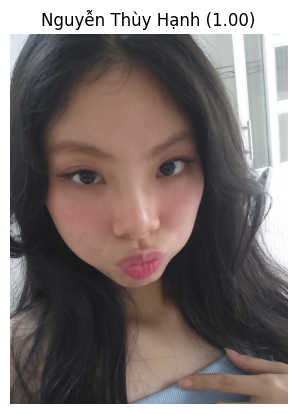

In [ ]:
# ----- 1. Import thư viện -----
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from google.colab import files

# ----- 2. Load model ANN -----
model_path = "face_ann_model.h5"
model = load_model(model_path)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model loaded successfully.")

# ----- 3. Mapping label → tên người (label_map) -----
# Đây là mapping bạn đã dùng khi train model
label_map = {
    0: "Nguyễn Tiến Hiếu",
    1: "Nguyễn Thùy Hạnh",
    2: "Nguyễn Trọng Phúc"
    # Thêm các người khác nếu có
}

# ----- 4. Tạo dictionary thông tin người -----
person_info = {
    0: {"name": "Nguyễn Tiến Hiếu", "MSSV":31241024870, "email": "hieunguyen.31241024870@st.ueh.edu.vn"},
    1: {"name": "Nguyễn Thùy Hạnh", "MSSV": 31241020023, "email": "hanhnguyen.31241020023@st.ueh.edu.vn"},
    2: {"name": "Nguyễn Trọng Phúc", "MSSV": 31241023508, "email": "phucnguyen.31241023508@st.ueh.edu.vn"}
    # Thêm các người khác tương ứng với label_map
}

# ----- 5. Upload nhiều ảnh cùng lúc -----
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn)
    if img is None:
        print(f"Không đọc được ảnh: {fn}")
        continue

    # Chuyển sang grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize về 64x64 (như input train)
    img_resized = cv2.resize(img_gray, (64,64))

    # Flatten + normalize
    img_flat = img_resized.flatten().astype("float32") / 255.0
    img_input = img_flat.reshape(1, -1)

    # Dự đoán
    preds = model.predict(img_input)
    label_idx = np.argmax(preds)
    confidence = preds[0][label_idx]

    # Lấy thông tin người
    info = person_info.get(label_idx, {})
    name = info.get("name", label_map.get(label_idx, "Unknown"))
    email = info.get("email", "N/A")
    mssv = info.get("MSSV", "N/A")


    # Hiển thị kết quả
    print(f"\n=== Kết quả cho ảnh {fn} ===")
    print(f"Nhận diện: {name}")
    print(f"Mã số sinh viên: {mssv}")
    print(f"Email: {email}")

    # Hiển thị ảnh
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{name} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

In [ ]:
# ----- 1. Cài Gradio -----
!pip install gradio

import gradio as gr
import cv2
import numpy as np
from keras.models import load_model

# ----- 2. Load model -----
model_path = "face_ann_model.h5"
model = load_model(model_path)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----- 3. Label map và thông tin -----
label_map = {
    0: "Nguyễn Tiến Hiếu",
    1: "Nguyễn Thùy Hạnh",
    2: "Nguyễn Trọng Phúc"
}

person_info = {
    0: {"name": "Nguyễn Tiến Hiếu", "MSSV":31241024870, "email": "hieunguyen.31241024870@st.ueh.edu.vn"},
    1: {"name": "Nguyễn Thùy Hạnh", "MSSV": 31241020023, "email": "hanhnguyen.31241020023@st.ueh.edu.vn"},
    2: {"name": "Nguyễn Trọng Phúc", "MSSV": 31241023508, "email": "phucnguyen.31241023508@st.ueh.edu.vn"}
}

# ----- 4. Hàm dự đoán -----
def predict_face(image):
    # Resize về 64x64 grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_resized = cv2.resize(img_gray, (64,64))

    # Flatten + normalize
    img_flat = img_resized.flatten().astype("float32") / 255.0
    img_input = img_flat.reshape(1, -1)

    # Dự đoán
    preds = model.predict(img_input)
    label_idx = np.argmax(preds)
    confidence = float(preds[0][label_idx])

    # Lấy thông tin
    info = person_info.get(label_idx, {})
    name = info.get("name", label_map.get(label_idx, "Unknown"))
    mssv = info.get("MSSV", "N/A")
    email = info.get("email", "N/A")

    # Trả kết quả
    result = {
        "Tên": name,
        "MSSV": mssv,
        "Email": email,
        "Độ tin cậy": f"{confidence:.2f}"
    }
    return result

# ----- 5. Tạo Web -----
demo = gr.Interface(
    fn=predict_face,
    inputs=gr.Image(type="numpy", label="Upload ảnh khuôn mặt"),
    outputs=gr.JSON(label="Kết quả nhận diện"),
    title="Hệ thống nhận diện khuôn mặt bằng ANN",
    description="Upload ảnh để nhận diện sinh viên."
)

# ----- 6. Chạy web -----
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cfc7e3768873803a69.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
